In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sensors import *
from functools import partial

In [2]:
# Отношение расстояния между датчиками к длине волны
dist_ratio = 0.5

# Case 1

Имеется 5 датчиков, 1 источник (дисперсия сигнала 0.7), и шум на каждом датчике имеет дисперсию 4.1.

In [3]:
Num_sensors1 = 5
Num_emitters1 = 1
sample_size1 = 100
theta1_rad = [0.5] # Направление прибытия (DOA) в радианах
theta1_deg = rad_to_deg(theta1_rad[0]) # Направление прибытия (DOA) в градусах
GS_1 = np.array([[0.7]]) # Ковариация сигнала
GN_1 = 4.1*np.eye(5, dtype=np.float64) # Ковариация шума
A1 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors1).reshape(-1,1) * np.sin(theta1_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s1 = CN(Num_emitters1, sample_size1, GS_1)
n1 = CN(Num_sensors1, sample_size1, GN_1)
X1 = (A1 @ s1.T + n1.T).T

In [4]:
EM_theta1_rad, neglhd_1, K1, mu1 = multi_start_EM(X1, GS_1, GN_1, 10, max_iter=50, eps=1e-6)

0-th start
Iteration=1, theta_new=[2.33106152], -likelihood = -88.91499
Iteration=2, theta_new=[2.36685834], -likelihood = -95.27496
Iteration=3, theta_new=[2.40210696], -likelihood = -102.75842
Iteration=4, theta_new=[2.43524149], -likelihood = -110.72234
Iteration=5, theta_new=[2.46526583], -likelihood = -118.40287
Iteration=6, theta_new=[2.4916278], -likelihood = -125.20768
Iteration=7, theta_new=[2.51425685], -likelihood = -130.81492
Iteration=8, theta_new=[2.5334698], -likelihood = -135.18731
Iteration=9, theta_new=[2.54961324], -likelihood = -138.47722
Iteration=10, theta_new=[2.56312072], -likelihood = -140.88260
Iteration=11, theta_new=[2.57432185], -likelihood = -142.61093
Iteration=12, theta_new=[2.58368645], -likelihood = -143.83059
Iteration=13, theta_new=[2.59144508], -likelihood = -144.69269
Iteration=14, theta_new=[2.59789839], -likelihood = -145.29360
Iteration=15, theta_new=[2.60322611], -likelihood = -145.71278
Iteration=16, theta_new=[2.60767498], -likelihood = -146.

In [5]:
EM_theta1_deg = rad_to_deg(EM_theta1_rad)

In [6]:
print(f"Погрешность в смысле разности углов в градусах: {np.abs(EM_theta1_deg-theta1_deg)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta1_rad)-np.sin(theta1_rad))}.")

Погрешность в смысле разности углов в градусах: [0.69756206].
Погрешность в смысле разности синусов углов [0.01064856].


# Case 2

Имеется 5 датчиков, 2 источника (дисперсии сигналов - 2 и 3), и шум на каждом датчике имеет дисперсию 7.1.

In [7]:
Num_sensors2 = 5
Num_emitters2 = 2
sample_size2 = 100
theta2_rad = np.array([0.34906585, 1.22173048]) # Направление прибытия (DOA) в радианах
theta2_deg = rad_to_deg(theta2_rad) # Направление прибытия (DOA) в градусах
GS_2 = np.array([[2,0],[0,3]]) # Ковариация сигнала
GN_2 = 7.1*np.eye(5, dtype=np.float64) # Ковариация шума
A2 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors2).reshape(-1,1) * np.sin(theta2_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s2 = CN(Num_emitters2, sample_size2, GS_2)
n2 = CN(Num_sensors2, sample_size2, GN_2)
X2 = (A2 @ s2.T + n2.T).T

In [8]:
EM_theta2_rad, neglhd_2, K2, mu2 = multi_start_EM(X2, GS_2, GN_2, 10, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[-2.37965824 -1.57083869], -likelihood = -372.54772
Iteration=2, theta_new=[-2.39243937 -1.57081901], -likelihood = -373.39814
Iteration=3, theta_new=[-2.40361551 -1.57076615], -likelihood = -374.01604
Iteration=4, theta_new=[-2.4134312  -1.57084155], -likelihood = -374.46819
Iteration=5, theta_new=[-2.42214033 -1.57076239], -likelihood = -374.79994
Iteration=6, theta_new=[-2.42990514 -1.57077502], -likelihood = -375.04501
Iteration=7, theta_new=[-2.43685073 -1.57082226], -likelihood = -375.22588
Iteration=8, theta_new=[-2.44306877 -1.57077313], -likelihood = -375.35874
Iteration=9, theta_new=[-2.44867302 -1.57078038], -likelihood = -375.45534
Iteration=10, theta_new=[-2.45375206 -1.57077043], -likelihood = -375.52498
Iteration=11, theta_new=[-2.45836524 -1.57081912], -likelihood = -375.57431
Iteration=12, theta_new=[-2.46257071 -1.57075583], -likelihood = -375.60815
Iteration=13, theta_new=[-2.46641566 -1.57080826], -likelihood = -375.63022
Iteration=

In [9]:
EM_theta2_deg = rad_to_deg(EM_theta2_rad)

In [10]:
print(f"Погрешность в смысле разности углов в градусах: {np.abs(EM_theta2_deg-theta2_deg)}.\nПогрешность в смысле разности синусов углов {np.abs(np.sin(EM_theta2_rad)-np.sin(theta2_rad))}.")

Погрешность в смысле разности углов в градусах: [109.99923211  61.33903954].
Погрешность в смысле разности синусов углов [1.34202014 0.78910536].


## Теперь имеет смысл определить примерный вид функции, оптимизируемой на М-шаге:

In [11]:
W1, W2 = goal_function_EM(X1, GS_1, GN_2, 50)

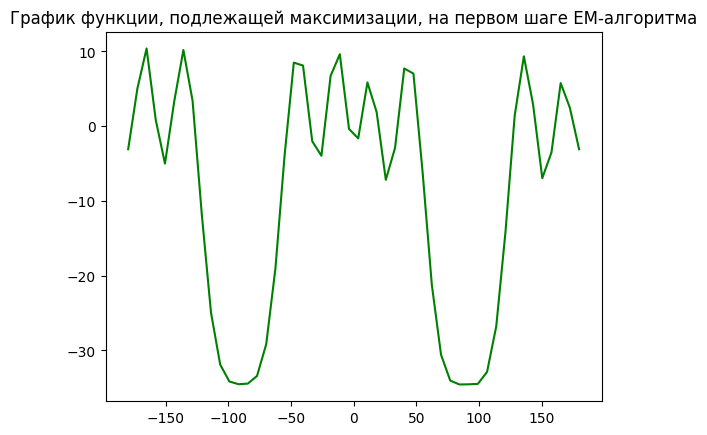

In [12]:
plt.title("График функции, подлежащей максимизации, на первом шаге ЕМ-алгоритма")
plt.plot(rad_to_deg(W1), W2.real, color='green')

Теперь проведем сравнение с **CAPON**:

In [13]:
R = space_covariance_matrix(X1)
angles = np.linspace(-1*np.pi, np.pi, 1000)
Powers = []
for angle in angles:
    a = steering_vector(dist_ratio, angle, 5)
    Powers.append(capon_func(a,R).real)

In [14]:
angles[np.argmax(Powers)]*180/np.pi

29.369369369369345

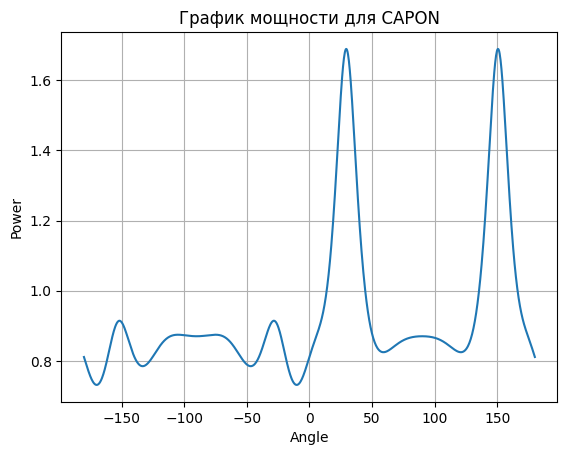

In [15]:
plt.title("График мощности для CAPON")
plt.plot(angles*180/np.pi, Powers) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

In [16]:
angles_near = np.linspace(0.5-0.1, 0.5+0.1, 100)
Powers_near = []
for angle in angles_near:
    a = steering_vector(dist_ratio, angle, 5)
    Powers_near.append(capon_func(a,R).real)

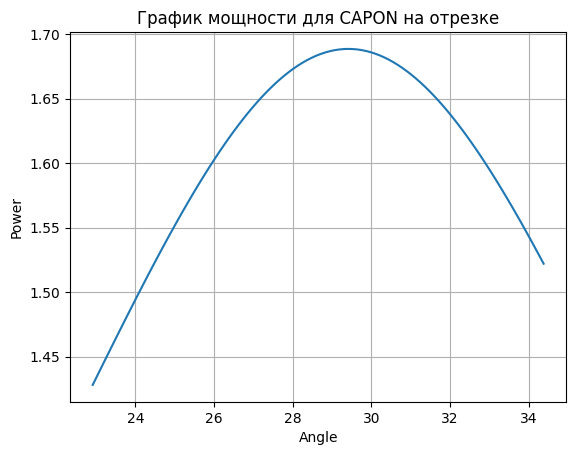

In [17]:
plt.title("График мощности для CAPON на отрезке")
plt.plot(rad_to_deg(angles_near), Powers_near) 
plt.xlabel("Angle")
plt.ylabel("Power")
plt.grid()
plt.show()

# Оценка **CAPON** в градусах для первого случая

In [18]:
capon_theta1_deg = rad_to_deg(angles_near[np.argmax(Powers_near)])

In [19]:
print(f"Оценка CAPON: {capon_theta1_deg}, \nОценка ЕМ-алгоритма: {EM_theta1_deg}, \nИстинное значение: {theta1_deg}")

Оценка CAPON: 29.40025857843012, 
Оценка ЕМ-алгоритма: [29.34545182], 
Истинное значение: 28.64788975654116


# Case 3

Имеется 7 датчиков, 3 источника (дисперсии сигналов - 0.1, 0.5 и 0.9), и шум на каждом датчике имеет дисперсию 1.1.

In [20]:
Num_sensors3 = 7
Num_emitters3 = 3
sample_size3 = 100
theta3_rad = [0.5, 1.2, 1.6] # Направление прибытия (DOA) в радианах
theta3_deg = rad_to_deg(theta3_rad[0]) # Направление прибытия (DOA) в градусах
GS_3 = np.diag([0.1, 0.5, 0.9]) # Ковариация сигнала
GN_3 = 1.1*np.eye(7, dtype=np.float64) # Ковариация шума
A3 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors3).reshape(-1,1) * np.sin(theta3_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s3 = CN(Num_emitters3, sample_size3, GS_3)
n3 = CN(Num_sensors3, sample_size3, GN_3)
X3 = (A3 @ s3.T + n3.T).T

In [21]:
EM_theta3_rad, neglhd_3, K3, mu3 = multi_start_EM(X3, GS_3, GN_3, 25, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[-3.07610388  0.03952106 -2.24412828], -likelihood = -235.49186
Iteration=2, theta_new=[-3.04817233  0.04314285 -2.17533504], -likelihood = -307.26896
Iteration=3, theta_new=[-3.02907488  0.04597837 -2.09180899], -likelihood = -454.38198
Iteration=4, theta_new=[-3.01576327  0.05121495 -2.01017873], -likelihood = -650.03524
Iteration=5, theta_new=[-3.00636971  0.057864   -1.93593573], -likelihood = -820.34190
Iteration=6, theta_new=[-2.99939854  0.06413918 -1.86938754], -likelihood = -936.39486
Iteration=7, theta_new=[-2.99399754  0.06929305 -1.8087381 ], -likelihood = -1006.16432
Iteration=8, theta_new=[-2.98978419  0.07330834 -1.75137569], -likelihood = -1045.99783
Iteration=9, theta_new=[-2.98652312  0.07640324 -1.69267051], -likelihood = -1068.28840
Iteration=10, theta_new=[-2.98398853  0.07875844 -1.61161892], -likelihood = -1080.67928
Iteration=11, theta_new=[-2.98235686  0.08066288 -1.57077763], -likelihood = -1085.84976
Iteration=12, theta_new=[

In [22]:
EM_theta3_rad

array([ 0.90743411,  0.49788206, -1.570779  ])

# Case 4

Имеется 7 датчиков, 3 источника (дисперсии сигналов - 0.5, 0.5 и 0.5), и шум на каждом датчике имеет дисперсию 1.1.

In [23]:
Num_sensors4 = 7
Num_emitters4 = 3
sample_size4 = 100
theta4_rad = [0.5, 1.1, -0.3] # Направление прибытия (DOA) в радианах
theta4_deg = rad_to_deg(theta4_rad[0]) # Направление прибытия (DOA) в градусах
GS_4 = np.diag([0.5, 0.5, 0.5]) # Ковариация сигнала
GN_4 = 1.1*np.eye(7, dtype=np.float64) # Ковариация шума
A4 = np.exp(-2j * np.pi * dist_ratio * np.arange(Num_sensors4).reshape(-1,1) * np.sin(theta4_rad).reshape(1,-1)) # Матрица управляющих векторов
# Генерация векторов сигнала, шума и принятого сигнала
s4 = CN(Num_emitters4, sample_size4, GS_4)
n4 = CN(Num_sensors4, sample_size4, GN_4)
X4 = (A4 @ s4.T + n4.T).T

In [24]:
EM_theta4_rad, neglhd_4, K4, mu4 = multi_start_EM(X4, GS_4, GN_4, 30, max_iter=20, eps=1e-6)

0-th start
Iteration=1, theta_new=[-0.26494956 -0.99187314  1.00813536], -likelihood = -909.94865
Iteration=2, theta_new=[-0.27088558 -1.00698863  1.0333606 ], -likelihood = -938.87848
Iteration=3, theta_new=[-0.27542011 -1.01939603  1.05264304], -likelihood = -955.16422
Iteration=4, theta_new=[-0.27891566 -1.02888662  1.06729233], -likelihood = -964.30072
Iteration=5, theta_new=[-0.28160697 -1.03570143  1.07843923], -likelihood = -969.52888
Iteration=6, theta_new=[-0.28369959 -1.04039429  1.0869133 ], -likelihood = -972.60487
Iteration=7, theta_new=[-0.28531723 -1.0432531   1.09336058], -likelihood = -974.46881
Iteration=8, theta_new=[-0.28654587 -1.0448864   1.0982831 ], -likelihood = -975.63173
Iteration=9, theta_new=[-0.28749312 -1.04555127  1.10210038], -likelihood = -976.38046
Iteration=10, theta_new=[-0.28821619 -1.04548993  1.10506657], -likelihood = -976.88595
Iteration=11, theta_new=[-0.28878903 -1.04493704  1.10739139], -likelihood = -977.23825
Iteration=12, theta_new=[-0.28

In [25]:
EM_theta4_rad

array([ 0.51220928,  1.10906003, -0.29347127])